In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
mean1=[3,6]
covar1=[[2,0.7],[0.7,1]]

d1=np.random.multivariate_normal(mean1,covar1,500)
print(d1.shape)

(500, 2)


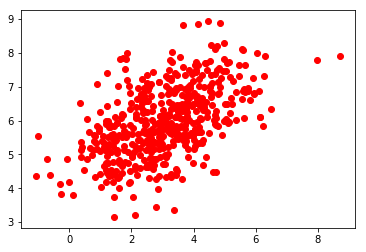

In [16]:
plt.scatter(d1[:,0],d1[:,1],color="red")
plt.show()

In [17]:
mean2=[0.5,2]
covar2=[[2,0.3],[0.3,1]]

d2=np.random.multivariate_normal(mean2,covar2,500)
print(d2.shape)

(500, 2)


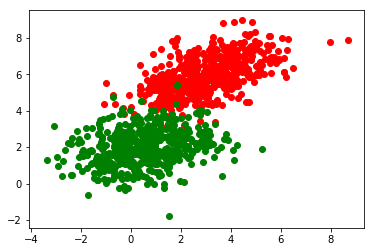

In [21]:
plt.scatter(d1[:,0],d1[:,1],color="red")
plt.scatter(d2[:,0],d2[:,1],color="green")
plt.show()

In [27]:
dataset=np.zeros((d1.shape[0]+d2.shape[0],d1.shape[1]+1)) #1000,3
print(dataset.shape)
dataset[:d1.shape[0],:2]=d1
dataset[d1.shape[0]:,:2]=d2
dataset[d1.shape[0]:,-1]=1 #red is 0 green is 1
np.random.shuffle(dataset)
print(dataset.shape)
print(dataset)

(1000, 3)
(1000, 3)
[[ 4.6220537   4.4723947   0.        ]
 [ 0.48784821  2.32027882  1.        ]
 [ 4.27472362  5.34863214  0.        ]
 ...
 [ 2.31523983  6.41256949  0.        ]
 [-0.65446027  0.9193685   1.        ]
 [ 0.10965366  2.47279781  1.        ]]


In [55]:
split=(int)(0.7*dataset.shape[0])
print(split)

700


In [56]:
X_train=dataset[:split,:2]
y_train=dataset[:split,-1]

X_test=dataset[split:,:2]
y_test=dataset[split:,-1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 2)
(300, 2)
(700,)
(300,)


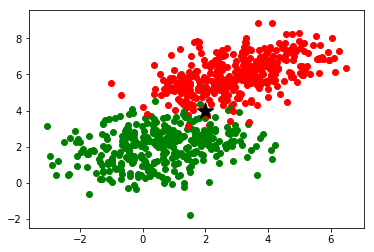

In [66]:
test_point=[2,4]
for point,label in zip(X_train,y_train):
    if label==0:
        plt.scatter(point[0],point[1],color="red")
    else:
        plt.scatter(point[0],point[1],color="green")
plt.scatter(test_point[0],test_point[1],color="black",s=300,marker="*")
plt.show()

In [67]:
def eucledian(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [68]:
p1=np.array([1,3])
p2=np.array([2,4])
eucledian(p1,p2)

1.4142135623730951

In [69]:
def knn(X_train,y_train,test_point,k=5):
    all_dist=[]
    for point,label in zip(X_train,y_train):
        dist=eucledian(point,test_point)
        all_dist.append((dist,label))
    all_dist=sorted(all_dist, key=lambda x:x[0])
    all_dist=np.array(all_dist)
    all_dist=all_dist[:k]
    
    freq=np.unique(all_dist[:,1],return_counts=True)
    print(freq)
    labels,counts=freq
    ans=labels[counts.argmax()]
    return ans
    

In [70]:
output=knn(X_train,y_train,test_point,k=5)
print(output)

(array([0., 1.]), array([3, 2]))
0.0


In [71]:
def get_all_predictions(X_train,y_train,X_test,k=5):
    predictions=[]
    for test_point in X_test:
        test_label=knn(X_train,y_train,test_point,k)
        predictions.append(test_label)
    return predictions

In [72]:
predictions=get_all_predictions(X_train,y_train,X_test,k=5)
print(predictions)

(array([0.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([0.]), array([5]))
(array([1.]), array([5]))
(array([0.]), array([5]))
(array([0.]), array([5]))
(array([0.]), array([5]))
(array([0.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([0.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([0.]), array([5]))
(array([0.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([0.]), array([5]))
(array([0., 1.]), array([3, 2]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([1.]), array([5]))
(array([0.]), array([5]))
(array([1.]), array([5]))
(array([0.]), array([5]))
(array([1.]), array([5]))
(array([0., 1.]), array([2, 3]))
(array([1.]), array([5]))
(array([0., 1.]), array([4, 1]))
(array([0.]), array([5]))
(array([0.]), array([5]))
(array([0.]), arr

In [73]:
def get_accuracy(pred,true_labels):
    return  (pred==true_labels).sum()/true_labels.shape[0]
    

In [74]:
print(get_accuracy(predictions,y_test))

0.9833333333333333
